# Iterative numerical solution of the optimization problem


$\min_{w \in R^{2}}\left\{F(w) = w_{1}w_{2}e^{-w_{1}^{2}-w_{2}^2}\right\}$

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d



def myFun(w):
    return np.exp(-w[0]**2-w[1]**2)*(w[0]*w[1])

def gradFun(w):
    return np.array([np.exp(-w[0]**2-w[1]**2)*w[1]-2*np.exp(-w[0]**2-w[1]**2)*(w[0]**2)*w[1], \
                     np.exp(-w[0]**2-w[1]**2)*w[0]-2*np.exp(-w[0]**2-w[1]**2)*(w[1]**2)*w[0]])

w=np.array([1.0,2.0])
print(myFun(w))
print(gradFun(w))


''' fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = myFun(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)'''


0.013475893998170934
[-0.01347589 -0.04716563]


' fig = pt.figure()\nax = fig.gca(projection="3d")\n\nxmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]\nfmesh = myFun(np.array([xmesh, ymesh]))\nax.plot_surface(xmesh, ymesh, fmesh)'

NameError: name 'xmesh' is not defined

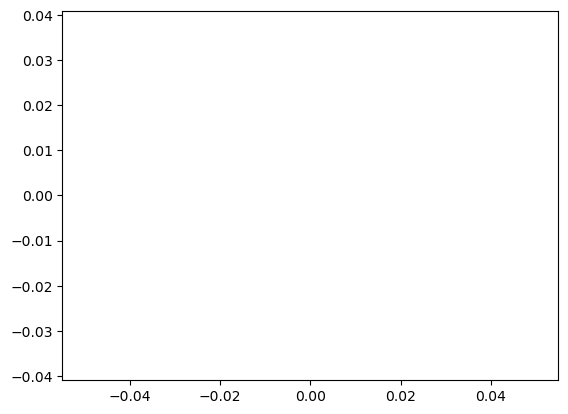

In [2]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Optimization Algorithm Implemenation

In [3]:

def oneDFun(alpha):
     return myFun(x + alpha*dk)
    

iterate = np.array([-2.0, 2.0])  #initial iterate
historyIter = [iterate]
historyFun=[myFun(iterate)]
maxIter=1000
tol=0.0001
k=0


grad=gradFun(iterate)
#print(la.norm(grad))

while  (la.norm(gradFun(iterate)) > tol) and (k <= maxIter):
#for i in range(maxIter):
     dk = -gradFun(iterate)
     ################ constant step length
     next_iterate = iterate + 0.1*dk  # constant alpha
     ################ Exact line search
     #exactAlpha = sopt.golden(oneDFun)   #  optimal alpha
     #next_iterate = iterate + exactAlpha*dk
    
     historyIter.append(next_iterate)
     funValue=myFun(next_iterate)
     historyFun.append(funValue)
     k=k+1
     #grad=gradFun(iterate)
     #print(la.norm(grad))
     iterate=next_iterate
        
       

#dk = -gradFun(iterate)
#def oneDFun(alpha):
#    return myFun(x + alpha*dk)
#alpha=0.01
# exactAlpha = sopt.golden(oneDFun)   #  needs import scipy.optimize as sopt
#next_iterate = iterate + exactAlpha *dk



print(iterate)
grad=gradFun(iterate)
print(la.norm(grad))
print(k)


#x=np.linspace(0,maxIter)
#pt.plot(x, historyFun, label='linear')
#pyplot(x,historyFun)
#print(historyFun)

[-0.70720288  0.70720288]
9.998775646955203e-05
512


Plot how the values of the function progress towards the minimum objective funciton value, i.e., $F(w^{*})$

513


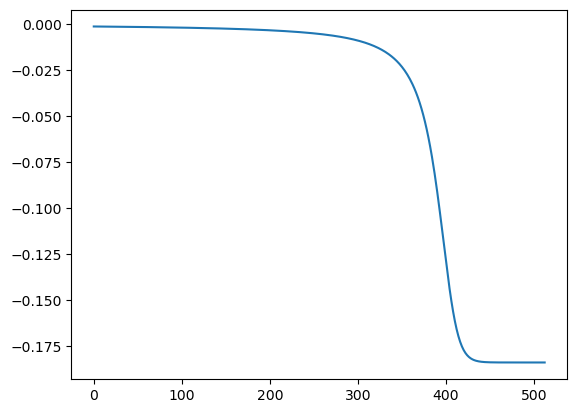

In [4]:
functionValues = np. array(historyFun)
functionValues = functionValues.flatten()
n=len(functionValues)
print(n)
x=range(n)
pt.plot(x, historyFun)